In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
import os

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir('E:\Project Data')

In [3]:
bikeData = pd.read_csv('day.csv')

In [4]:
df = DataFrame(bikeData,columns=['instant','dteday','season','yr','mnth','holiday','weekday',
                                 'workingday','weathersit','temp','atemp','hum','windspeed',
                                 'casual','registered','cnt'])

corr_df = DataFrame(bikeData, columns=['season','yr','mnth','holiday','weekday',
                                 'workingday','weathersit','temp','atemp','hum','windspeed',
                                 'casual','registered','cnt'])


In [5]:
#DENORMALIZE THE NUMERICAL VALUES
df['temp'] = df['temp'] * (47) -8
df['atemp'] = df['atemp'] * (66) - 16
df['hum'] = df['hum'] * 100
df['windspeed'] = df['windspeed'] * 67

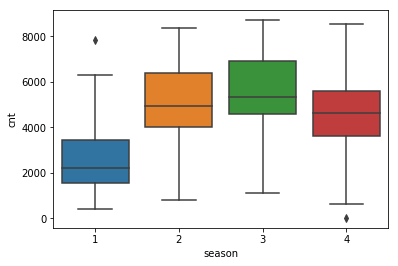

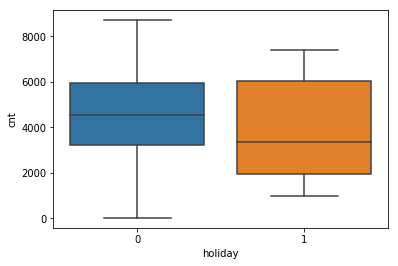

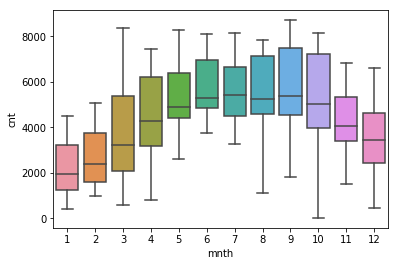

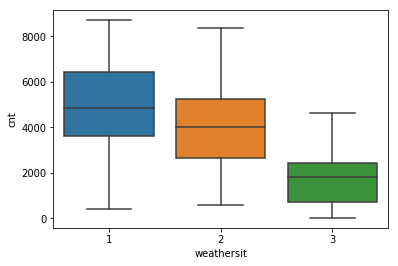

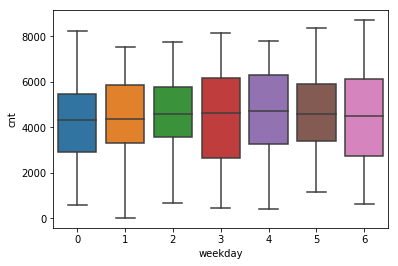

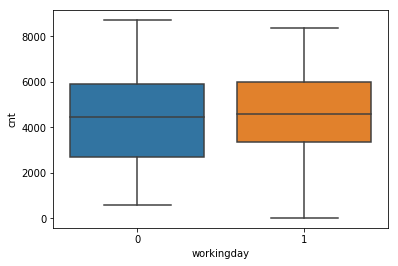

In [6]:
#BOX PLOTS TO CHECK FOR OUTLIERS
sea_plot = sns.boxplot(x="season", y="cnt", data=df)
plt.show()
hol_plot = sns.boxplot(x="holiday", y="cnt", data=df)
plt.show()
mn_plot = sns.boxplot(x="mnth", y="cnt", data=df)
plt.show()
weat_plot = sns.boxplot(x="weathersit", y="cnt", data=df)
plt.show()
weekd_plot = sns.boxplot(x="weekday", y="cnt", data=df)
plt.show()
wd_plot = sns.boxplot(x="workingday", y="cnt", data=df)
plt.show()


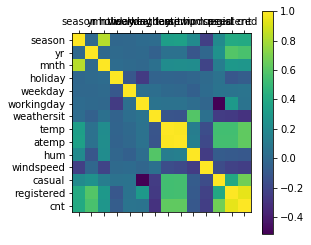

In [7]:
#PLOTTING THE CORRELATION MATRIX TO CHECK FOR MULTI-COLLINEARITY
plt.matshow(corr_df.corr())
plt.xticks(range(len(corr_df.columns)), corr_df.columns)
plt.yticks(range(len(corr_df.columns)), corr_df.columns)
plt.colorbar()
plt.show()


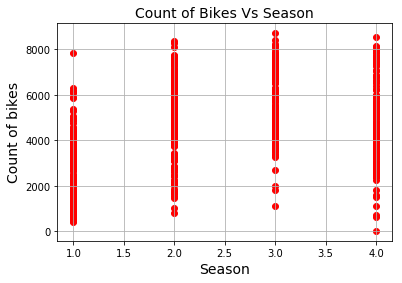

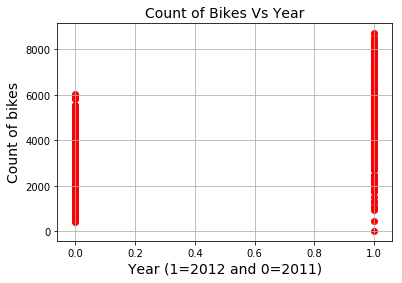

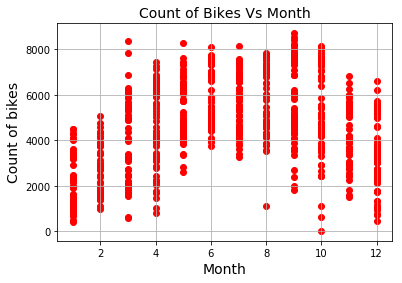

In [8]:
#LINEARITY CHECK FOR VARIABLE INTER-RELATIONSHIP
plt.scatter(df['season'], df['cnt'], color='red')
plt.title('Count of Bikes Vs Season', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count of bikes', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['yr'], df['cnt'], color='red')
plt.title('Count of Bikes Vs Year', fontsize=14)
plt.xlabel('Year (1=2012 and 0=2011)', fontsize=14)
plt.ylabel('Count of bikes', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['mnth'], df['cnt'], color='red')
plt.title('Count of Bikes Vs Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count of bikes', fontsize=14)
plt.grid(True)
plt.show()

In [9]:
#CREATING DATAFRAME WITH THE IMPORTANT PREDICTORS AND THE DEPENDENT VARIABLE
X = df[['season','mnth','weathersit','temp','atemp','hum','windspeed','yr']]
Y = df['cnt']

In [10]:
#SUMMARY OF THE CREATED DATAFRAMES
X.describe()

,season,mnth,weathersit,temp,atemp,hum,windspeed,yr
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,1.395349,15.283085,15.307363,62.789406,12.762576,0.500684
std,1.110807,3.451913,0.544894,8.603397,10.755438,14.242910,5.192357,0.500342
min,1.000000,1.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,0.000000
25%,2.000000,4.000000,1.000000,7.842925,6.297605,52.000000,9.041650,0.000000
50%,3.000000,7.000000,1.000000,15.421651,16.124378,62.666700,12.125325,1.000000
75%,3.000000,10.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1.000000
max,4.000000,12.000000,3.000000,32.498349,39.499136,97.250000,34.000021,1.000000


In [11]:
Y.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [12]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df2 = df.dropna()

In [14]:
#Using Statsmodels API (OLS)

X = df2[['season','weathersit','atemp','hum','windspeed','yr']]
Y = df2['cnt']

X = sm.add_constant(X) 
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     450.6
Date:                Sat, 15 Sep 2018   Prob (F-statistic):          1.52e-240
Time:                        18:03:35   Log-Likelihood:                -6001.4
No. Observations:                 731   AIC:                         1.202e+04
Df Residuals:                     724   BIC:                         1.205e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3128.6541    214.187     14.607      0.0

In [15]:
#USING SCIKIT LEARN TO RUN MULITPLE LINEAR REGRESSION
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\n\n\n**** Coefficients as Predicted by sklearn regression Model **** \n')
print('Coefficients: \n', regr.coef_)




**** Coefficients as Predicted by sklearn regression Model **** 

Coefficients: 
 [   0.          408.48794301 -554.61929394   90.49147588  -12.72535654
  -37.12768214 2032.09186733]
